#Timebased model



In [267]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# importing cleaned and filtered dataframes

#c_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_dataframe', index_col=0)
#f_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/my_filtered_dataframe', index_col=0)

og_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')

In [268]:
og_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [273]:
adf  = og_df.loc[df['price'] < og_df['price'].quantile(0.95)]
fdf  = adf.loc[adf['price'] > adf['price'].quantile(0.30)]
fdf['condition'].replace({ 'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}, inplace=True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 1 to 21595
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14343 non-null  int64  
 1   date           14343 non-null  object 
 2   price          14343 non-null  float64
 3   bedrooms       14343 non-null  int64  
 4   bathrooms      14343 non-null  float64
 5   sqft_living    14343 non-null  int64  
 6   sqft_lot       14343 non-null  int64  
 7   floors         14343 non-null  float64
 8   waterfront     12747 non-null  object 
 9   view           14301 non-null  object 
 10  condition      14343 non-null  int64  
 11  grade          14343 non-null  object 
 12  sqft_above     14343 non-null  int64  
 13  sqft_basement  14343 non-null  object 
 14  yr_built       14343 non-null  int64  
 15  yr_renovated   11812 non-null  float64
 16  zipcode        14343 non-null  int64  
 17  lat            14343 non-null  float64
 18  long  

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

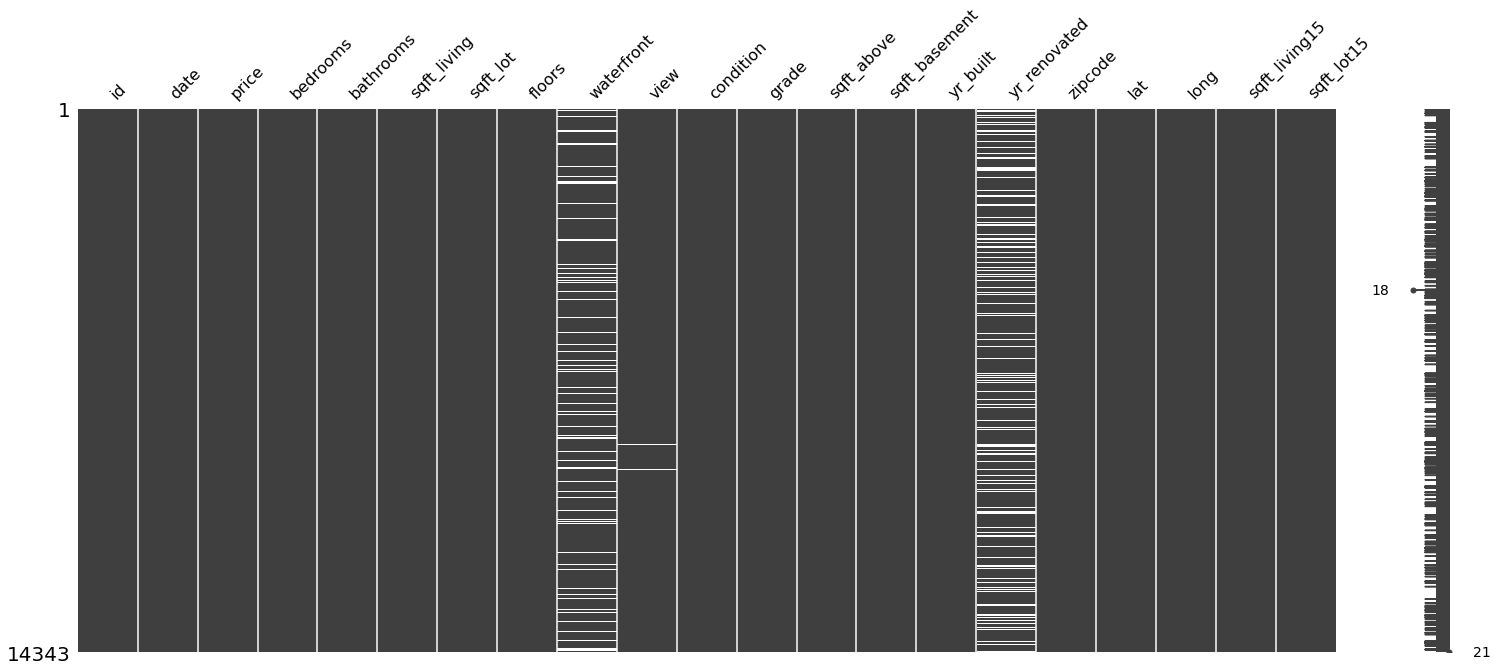

In [235]:
msno.matrix(fdf)

<AxesSubplot:>

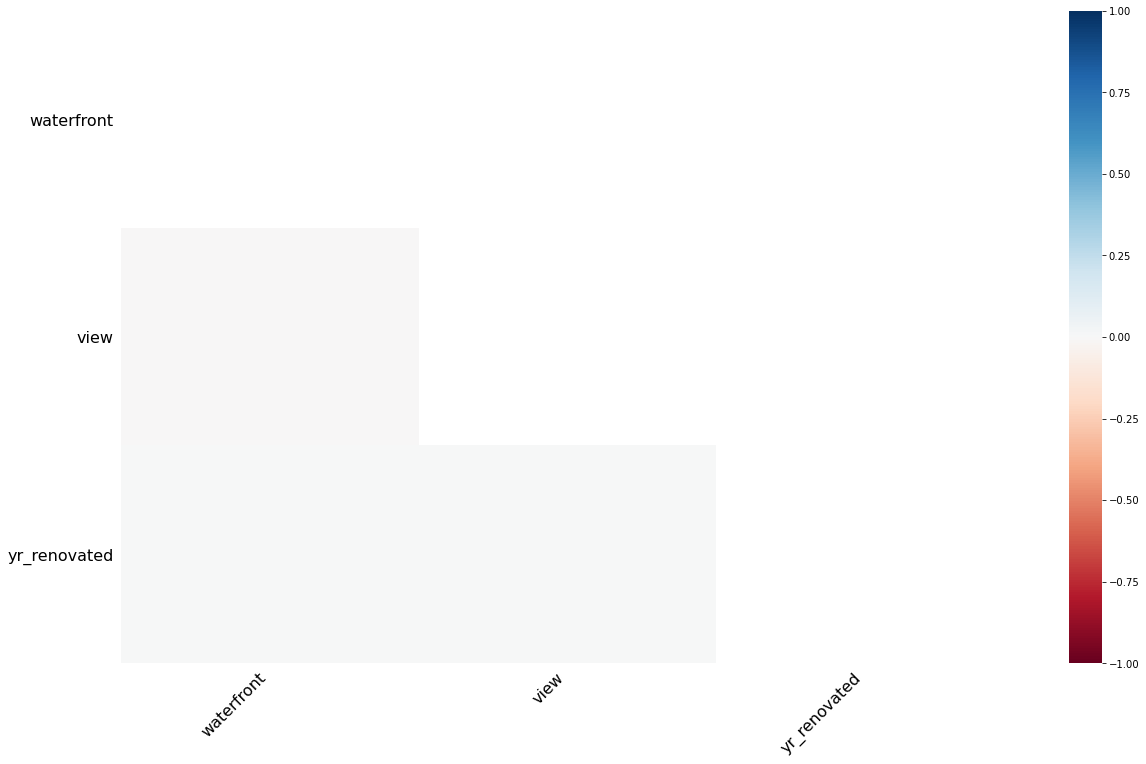

In [236]:
msno.heatmap(fdf)

<AxesSubplot:>

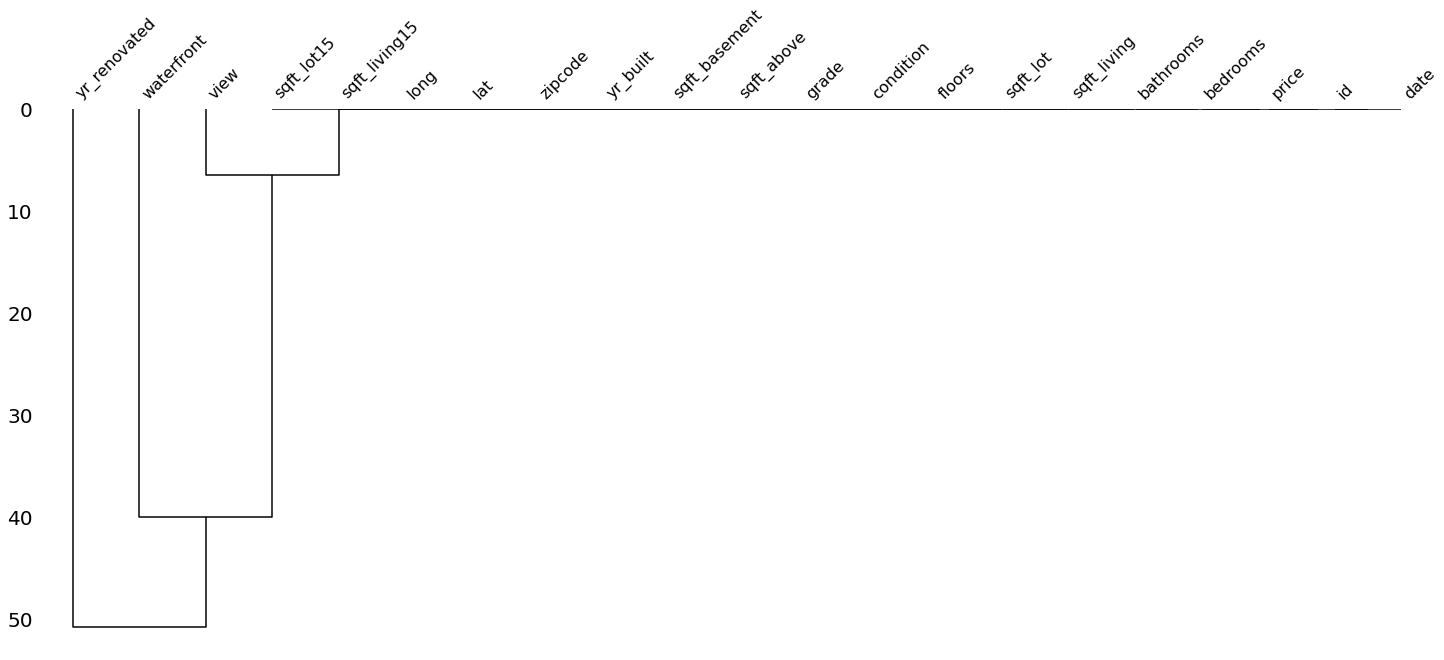

In [237]:
msno.dendrogram(fdf)

In [238]:
fdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [239]:
tdf =fdf[['price', 'date', 'yr_built', 'yr_renovated', 'id']]
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 1 to 21595
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         14343 non-null  float64
 1   date          14343 non-null  object 
 2   yr_built      14343 non-null  int64  
 3   yr_renovated  11812 non-null  float64
 4   id            14343 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 672.3+ KB


In [240]:
ldf = fdf[['price', 'view', 'zipcode', 'lat', 'long']]
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 1 to 21595
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    14343 non-null  float64
 1   view     14301 non-null  object 
 2   zipcode  14343 non-null  int64  
 3   lat      14343 non-null  float64
 4   long     14343 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 672.3+ KB


In [241]:
vdf = ldf.dropna()


In [242]:
fig = px.scatter_mapbox(vdf,
                        lat='lat',
                        lon='long',
                        color='view',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [243]:


ftdf['price'].describe()
#tdf = tdf[tdf['price'] > tdf[tdf['price']].quantile(0.05)
#tdf = tdf[tdf['price'] < tdf[tdf['price']].quantile(0.97)

count    19436.00
mean    450842.14
std     177646.58
min      78000.00
25%     310000.00
50%     425000.00
75%     571600.00
max     886000.00
Name: price, dtype: float64

In [244]:
ftdf['yr_renovated'].dropna()

0          0.00
1       1991.00
3          0.00
4          0.00
6          0.00
          ...  
21592      0.00
21593      0.00
21594      0.00
21595      0.00
21596      0.00
Name: yr_renovated, Length: 15978, dtype: float64

In [245]:
ftdf.describe()

,price,yr_built,yr_renovated,id
count,19436.00,19436.00,15978.00,19436.00
mean,450842.14,1970.64,68.79,4617617646.02
std,177646.58,29.00,364.01,2877990315.44
min,78000.00,1900.00,0.00,1000102.00
25%,310000.00,1951.00,0.00,2141337705.00
50%,425000.00,1974.00,0.00,3920450130.00
75%,571600.00,1995.00,0.00,7345382763.75
max,886000.00,2015.00,2015.00,9900000190.00


In [246]:
df_matrix = ftdf.corr()
df_matrix['yr_built']


price           0.06
yr_built        1.00
yr_renovated   -0.21
id              0.03
Name: yr_built, dtype: float64

In [247]:
fdf['yr_renovated'].dropna()

1       1991.00
3          0.00
4          0.00
10         0.00
11         0.00
          ...  
21591      0.00
21592      0.00
21593      0.00
21594      0.00
21595      0.00
Name: yr_renovated, Length: 11812, dtype: float64

<AxesSubplot:>

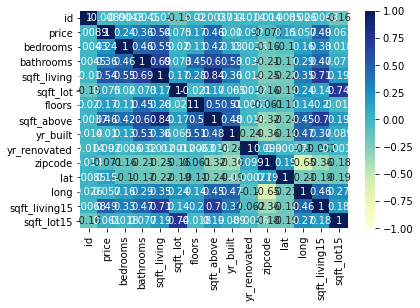

In [248]:
sns.heatmap(fdf.corr(), vmin=-1,vmax=1,center=0,annot=True,cmap="YlGnBu",)

In [252]:
fdf_matrix = fdf.corr()
fdf_matrix['price']

id              -0.01
price            1.00
bedrooms         0.24
bathrooms        0.36
sqft_living      0.54
sqft_lot         0.07
floors           0.17
sqft_above       0.46
yr_built         0.01
yr_renovated     0.09
zipcode         -0.07
lat              0.15
long             0.06
sqft_living15    0.49
sqft_lot15       0.06
Name: price, dtype: float64

<AxesSubplot:>

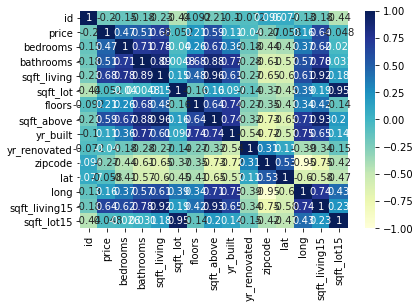

In [256]:
sns.heatmap(fdf_matrix.corr(), vmin=-1,vmax=1,center=0,annot=True,cmap="YlGnBu",)

In [257]:
fdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,14343.00,14343.00,14343.00,14343.00,14343.00,14343.00,14343.00,14343.00,14343.00,11812.00,14343.00,14343.00,14343.00,14343.00,14343.00
mean,4636654108.04,572719.36,3.45,2.21,2189.37,16457.95,1.56,1872.13,1971.98,84.85,98079.53,47.60,-122.21,2074.95,13571.67
std,2886542698.27,183036.58,0.93,0.69,792.57,45405.72,0.55,775.53,30.64,402.78,50.09,0.11,0.15,637.72,29587.32
min,1200019.00,339100.00,1.00,0.75,530.00,520.00,1.00,480.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,750.00
25%,2206100290.00,425000.00,3.00,1.75,1590.00,4800.00,1.00,1280.00,1951.00,0.00,98034.00,47.54,-122.33,1580.00,4916.00
50%,3935900350.00,530000.00,3.00,2.25,2100.00,7331.00,1.50,1680.00,1977.00,0.00,98074.00,47.62,-122.22,1970.00,7357.00
75%,7409700215.00,681000.00,4.00,2.50,2670.00,10889.00,2.00,2370.00,2000.00,0.00,98117.00,47.69,-122.11,2470.00,10223.00
max,9895000040.00,1150000.00,33.00,7.50,7480.00,1651359.00,3.50,7320.00,2015.00,2015.00,98199.00,47.78,-121.32,5380.00,871200.00


In [259]:
# Now if we normalize it by column:
#df_norm_row = fdf.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
 
# And see the result
#sns.heatmap(fdf_norm_col, cmap='viridis')
#plt.show()

Linear Regression

In [264]:
fdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [266]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287
